In [1]:
import numpy as np
import spectral as sp
import matplotlib.pyplot as plt
import cv2

imgCubePeeled = sp.open_image("../Normalised/potatobigpeeled_b1_lowIG_VNIR_1800_SN00841_HSNR2_6000us_2020-10-09T161707_raw_rad_nn.hdr")
imgCube = sp.open_image("../Normalised/potatobig_b1_lowIG_VNIR_1800_SN00841_HSNR2_6000us_2020-10-09T155115_raw_rad_nn.hdr")
print(imgCube)

N,M,Bands = imgCubePeeled.shape
K = 5 #number of potatoes in img

margin = 1000
marg = 30

imgBandPeeled = (imgCubePeeled.read_band(140))[margin:,:]
imgBand = imgCube.read_band(140)[margin:,:]

imgBandPeeled8bit = (imgBandPeeled*256).astype('uint8')
imgBand8bit = (imgBand*256).astype('uint8')
                        
threshPeeled = cv2.threshold(imgBandPeeled8bit, 30, 255, cv2.THRESH_BINARY)[1] # + cv2.THRESH_OTSU
thresh = cv2.threshold(imgBand8bit, 30, 255, cv2.THRESH_BINARY)[1]
                        
cntPeeled = sorted(cv2.findContours(threshPeeled, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)
cnt = sorted(cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)

	Data Source:   '././../Normalised/potatobig_b1_lowIG_VNIR_1800_SN00841_HSNR2_6000us_2020-10-09T155115_raw_rad_nn.img'
	# Rows:           6347
	# Samples:        1800
	# Bands:           186
	Interleave:        BIP
	Quantization:  32 bits
	Data format:   float32


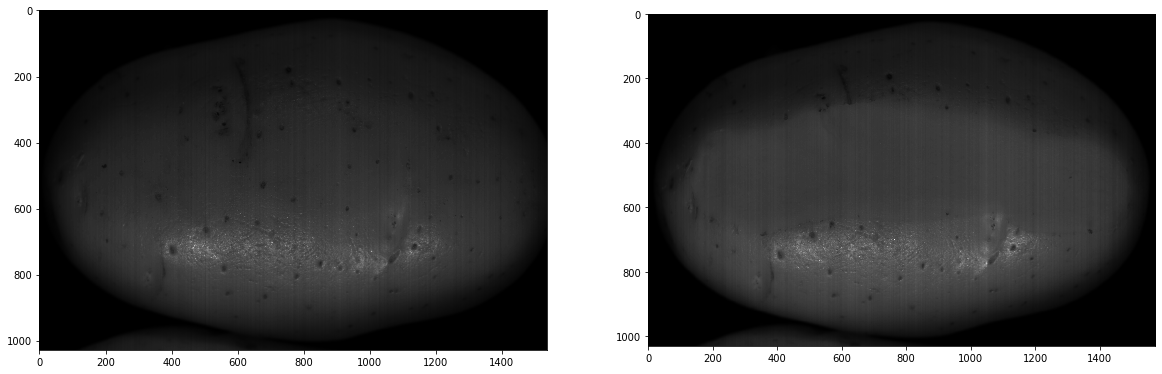

<Figure size 432x288 with 0 Axes>

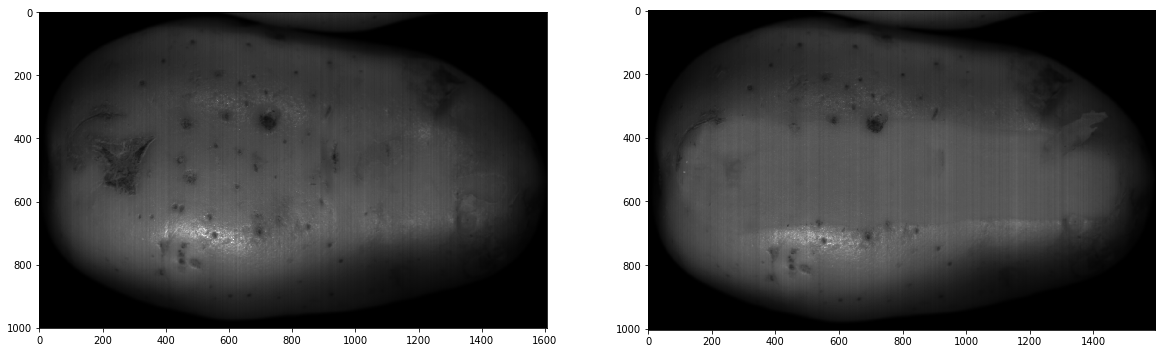

<Figure size 432x288 with 0 Axes>

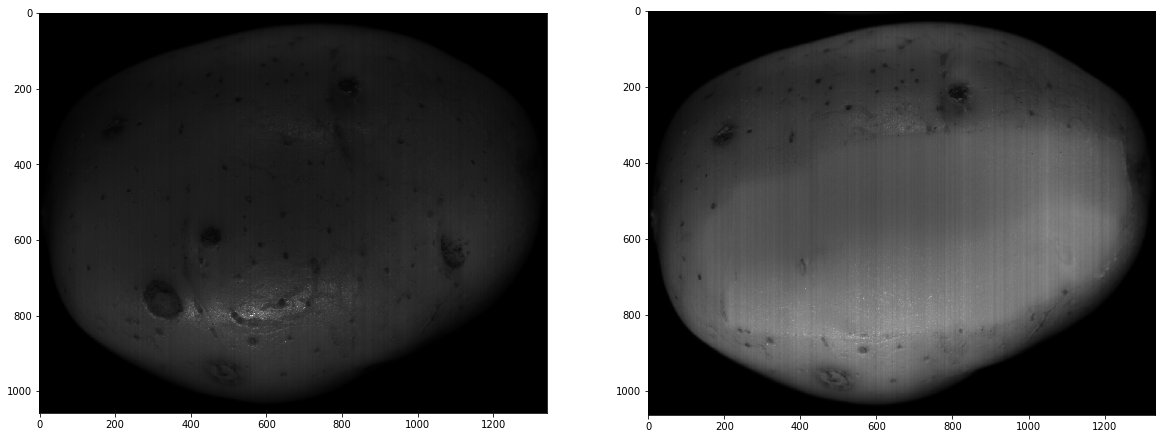

<Figure size 432x288 with 0 Axes>

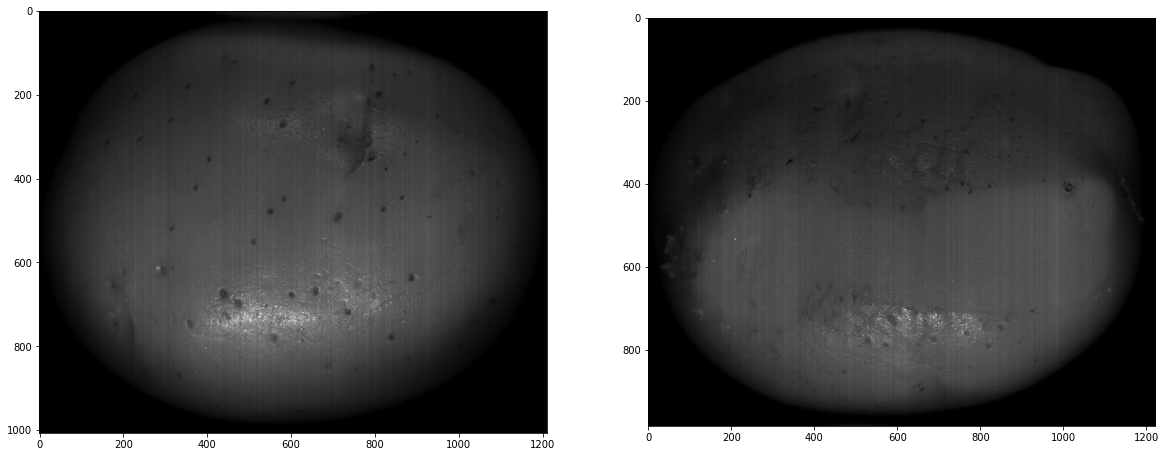

<Figure size 432x288 with 0 Axes>

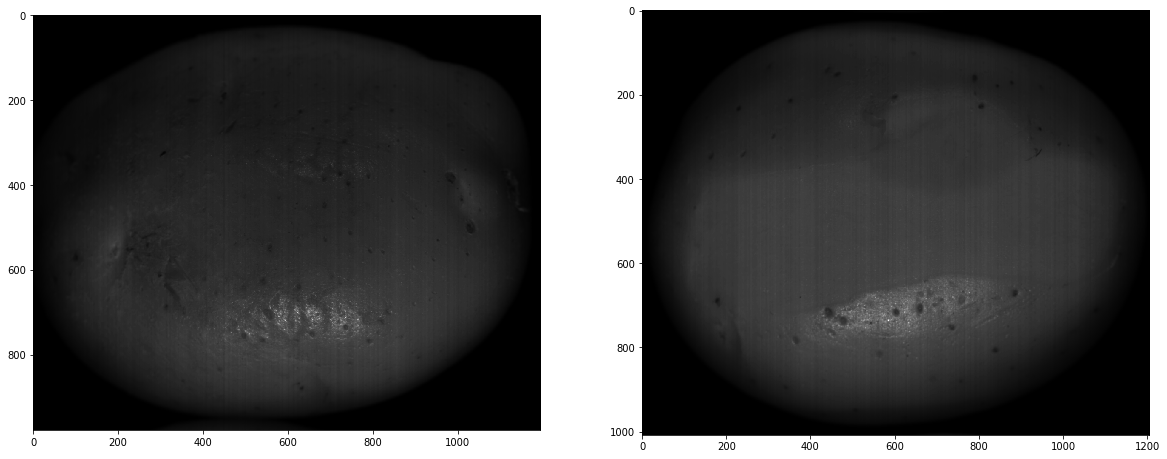

<Figure size 432x288 with 0 Axes>

In [2]:
for i in range(K):
    xp,yp,wp,hp = cv2.boundingRect(cntPeeled[-(i+1)])
    x, y, w, h = cv2.boundingRect(cnt[-(i+1)])
    
    potatoPeeled = (imgCubePeeled.read_subregion([margin-marg+yp,margin+marg+yp+hp],[xp-marg,xp+wp+marg]))
    potato = (imgCube.read_subregion([margin-marg+y,margin+marg+y+h],[x-marg,x+w+marg]))
    
    plt.figure(figsize = (20,20))
    plt.subplot(1, 2, 1)
    plt.imshow(potato[:,:,100],cmap="gray")
    plt.subplot(1, 2, 2)
    plt.imshow(potatoPeeled[:,:,100],cmap="gray")
    plt.figure()

    
    
    

# TO DO
# implementere opening / closing for å gjøre blackspots tydeligere (det hun snakket om på møtet)

# clippe verdiene på 255, sånn at overexposure ikke blir svart

# finne ut hva vi skal finne ut lol
# shape?
# blackspots?
# spekrumforskjeller?
# sammenligne små og store poteter?